In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
df = pd.read_csv('tourist_attractions.csv')

In [3]:
#view the dataset sample
df.head(5)

,name,type,region,locality,geolocation
0,"The ""second"" home shopping store ""IJ Churin an...",architecture,Amur region,Blagoveshchensk,"(Decimal('127.548877'), Decimal('49.811568'))"
1,"""Town of security officers""",architecture,Sverdlovsk region,Ekaterinburg,"(Decimal('60.621271'), Decimal('56.841798'))"
2,"""Palace for the beloved""",architecture,Kursk region,Safonovka,"(Decimal('35.139965'), Decimal('51.491293'))"
3,"""The House with The Firebird"" (manor Zhelyabov...",architecture,Tomsk region,Tomsk,"(Decimal('85.050946'), Decimal('56.469513'))"
4,"""House with the ghosts""",architecture,Novosibirsk region,Novosibirsk,"(Decimal('82.958761'), Decimal('55.041787'))"


In [4]:
print(df.columns.values) 

['name' 'type' 'region' 'locality' 'geolocation']


In [5]:
#to detect the missing data
def cleanData(x):
    return x.replace("Decimal","").replace("(","").replace(")","").replace("'","")

def getLat(x):
    try:
        return float(x.split(",")[0].strip())
    except:
        return None

def getLon(x):
    try:
        return float(x.split(",")[1].strip())
    except:
        return None

df['geolocation'] = df['geolocation'].apply(cleanData)

df['LAT'] = df['geolocation'].apply(getLat)

df['LON'] = df['geolocation'].apply(getLon)

df.isnull().sum()

name              0
type              0
region            0
locality        842
geolocation       0
LAT            1154
LON            1154
dtype: int64

In [6]:
df.dropna(inplace=True)
print(df.isnull().sum())

name           0
type           0
region         0
locality       0
geolocation    0
LAT            0
LON            0
dtype: int64


In [7]:
print(df.describe())

               LAT          LON
count  3526.000000  3526.000000
mean     54.607500    54.388840
std      28.703546     5.302799
min      19.942267    41.381243
25%      37.533239    51.719086
50%      43.867884    55.049509
75%      60.597465    57.910117
max     158.673956    69.343985


In [8]:
df.corr()

,LAT,LON
LAT,1.000000,-0.130872
LON,-0.130872,1.000000


In [9]:
print(len(df['name'].unique()))
df.shape

3177


(3526, 7)

<AxesSubplot:>

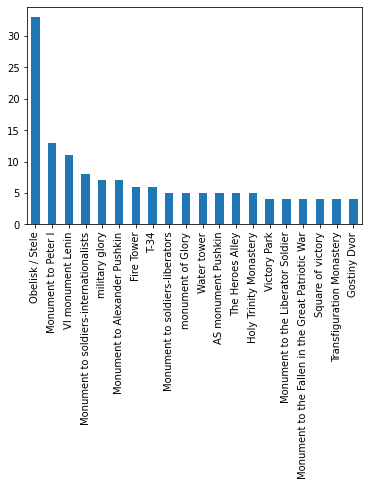

In [10]:
visits_by_name = df['name'].value_counts()
visits_by_name.head(20).plot.bar()

In [11]:
def applyVisitsByName(x):
    return visits_by_name[x]
df['visits_by_name'] = df['name'].apply(applyVisitsByName)
print(df['visits_by_name'].unique())

[ 1  2  3  5  4  7  6  8 11 13 33]


<AxesSubplot:>

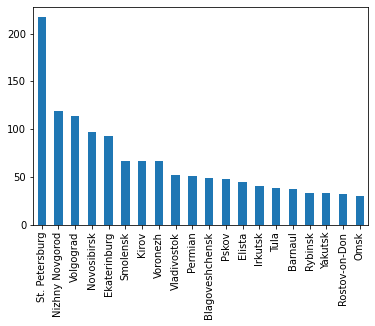

In [12]:
visits_by_locality = df['locality'].value_counts()
visits_by_locality.head(20).plot.bar()

In [13]:
def applyVisitsByLocality(x):
    return visits_by_locality[x]
df['visits_by_locality'] = df['locality'].apply(applyVisitsByLocality)
print(df['visits_by_locality'].unique())

[ 49  93   1  23  97   2  15   9  52  67 114   4 217  40  18   8  37 119
  45  25  16  26  51  10  11   5   3  20  33  19   7  24  14  48   6  38
  30  12  17  28  22  21  13  32]


<AxesSubplot:>

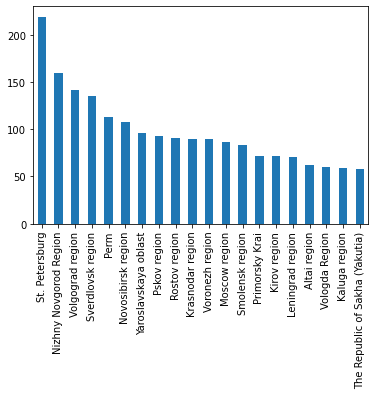

In [14]:
visits_by_region = df['region'].value_counts()
visits_by_region.head(20).plot.bar() #top 20 russian regions by count of tourist attracktions

In [15]:
def applyVisitsByRegion(x):
    return visits_by_region[x]
df['visits_by_region'] = df['region'].apply(applyVisitsByRegion)
print(df['visits_by_region'].unique())

[ 54 135  40  26 108  96  28  72  24  83 141  91 219  46  90  35  59  13
  62 159  50  32 113  23  14  39   6  70   7  60  29  38  18  37  93  11
  25  56  33  34  47  10  86  12   8   5  27  31  21  19  22  58   2   1
   4]


<AxesSubplot:>

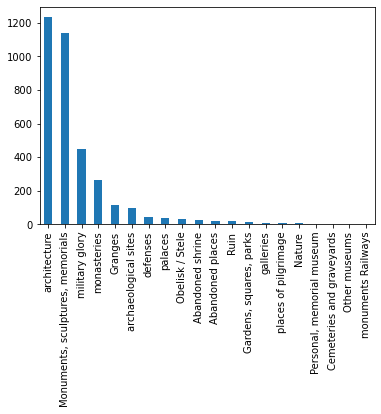

In [16]:
visits_by_type = df['type'].value_counts()
visits_by_type.head(20).plot.bar() #top 20 russian regions by count of tourist attracktions

In [17]:
def applyVisitsByType(x):
    return visits_by_type[x]
df['visits_by_type'] = df['type'].apply(applyVisitsByType)
print(df['visits_by_type'].unique())

[1233  450    9   12 1138    3    1    2    6   35   99   18   46  261
   24  117   22   33]


In [18]:
df.head(10)

,name,type,region,locality,geolocation,LAT,LON,visits_by_name,visits_by_locality,visits_by_region,visits_by_type
0,"The ""second"" home shopping store ""IJ Churin an...",architecture,Amur region,Blagoveshchensk,"127.548877, 49.811568",127.548877,49.811568,1,49,54,1233
1,"""Town of security officers""",architecture,Sverdlovsk region,Ekaterinburg,"60.621271, 56.841798",60.621271,56.841798,1,93,135,1233
2,"""Palace for the beloved""",architecture,Kursk region,Safonovka,"35.139965, 51.491293",35.139965,51.491293,1,1,40,1233
3,"""The House with The Firebird"" (manor Zhelyabov...",architecture,Tomsk region,Tomsk,"85.050946, 56.469513",85.050946,56.469513,1,23,26,1233
4,"""House with the ghosts""",architecture,Novosibirsk region,Novosibirsk,"82.958761, 55.041787",82.958761,55.041787,1,97,108,1233
5,"""House-decanter""",architecture,Sverdlovsk region,Verkh-neyvinsky,"60.131644, 57.265584",60.131644,57.265584,1,2,135,1233
6,"""Emelyanovsky number""",architecture,Yaroslavskaya oblast,Rostov,"39.414526, 57.185866",39.414526,57.185866,1,15,96,1233
7,"""Myasnikovskaya» Hospital",architecture,Yaroslavskaya oblast,Rostov,"39.414526, 57.185866",39.414526,57.185866,1,15,96,1233
8,"""The track Vejnbauma""",architecture,Belgorod region,Belgorod,"36.587223, 50.59566",36.587223,50.595660,1,9,28,1233
9,"""Mansion Khomich""",architecture,Tomsk region,Tomsk,"84.947649, 56.48464",84.947649,56.484640,1,23,26,1233


In [19]:
df[['visits_by_name','visits_by_locality','visits_by_region','visits_by_type']].corr()

,visits_by_name,visits_by_locality,visits_by_region,visits_by_type
visits_by_name,1.000000,-0.059031,-0.052594,-0.176639
visits_by_locality,-0.059031,1.000000,0.817241,0.269280
visits_by_region,-0.052594,0.817241,1.000000,0.140942
visits_by_type,-0.176639,0.269280,0.140942,1.000000


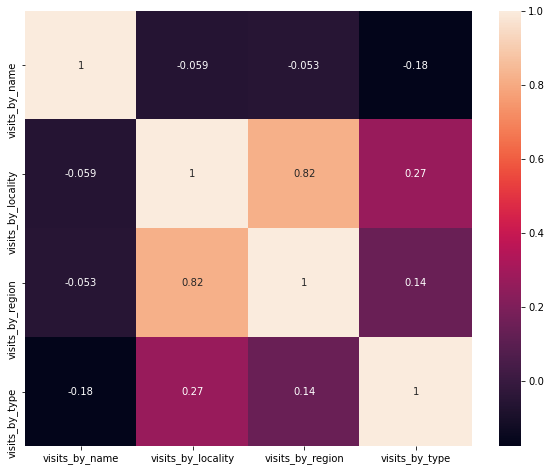

In [20]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df[['visits_by_name','visits_by_locality','visits_by_region','visits_by_type']].corr(), annot=True)
plt.show()

In [21]:
#df.drop(['visits_by_name'],axis=1,inplace=True)

In [22]:
df.head(10)

,name,type,region,locality,geolocation,LAT,LON,visits_by_name,visits_by_locality,visits_by_region,visits_by_type
0,"The ""second"" home shopping store ""IJ Churin an...",architecture,Amur region,Blagoveshchensk,"127.548877, 49.811568",127.548877,49.811568,1,49,54,1233
1,"""Town of security officers""",architecture,Sverdlovsk region,Ekaterinburg,"60.621271, 56.841798",60.621271,56.841798,1,93,135,1233
2,"""Palace for the beloved""",architecture,Kursk region,Safonovka,"35.139965, 51.491293",35.139965,51.491293,1,1,40,1233
3,"""The House with The Firebird"" (manor Zhelyabov...",architecture,Tomsk region,Tomsk,"85.050946, 56.469513",85.050946,56.469513,1,23,26,1233
4,"""House with the ghosts""",architecture,Novosibirsk region,Novosibirsk,"82.958761, 55.041787",82.958761,55.041787,1,97,108,1233
5,"""House-decanter""",architecture,Sverdlovsk region,Verkh-neyvinsky,"60.131644, 57.265584",60.131644,57.265584,1,2,135,1233
6,"""Emelyanovsky number""",architecture,Yaroslavskaya oblast,Rostov,"39.414526, 57.185866",39.414526,57.185866,1,15,96,1233
7,"""Myasnikovskaya» Hospital",architecture,Yaroslavskaya oblast,Rostov,"39.414526, 57.185866",39.414526,57.185866,1,15,96,1233
8,"""The track Vejnbauma""",architecture,Belgorod region,Belgorod,"36.587223, 50.59566",36.587223,50.595660,1,9,28,1233
9,"""Mansion Khomich""",architecture,Tomsk region,Tomsk,"84.947649, 56.48464",84.947649,56.484640,1,23,26,1233


## Recommendations by searching the Names of Place

In [23]:
tourist_visits = df[['name','region','locality','visits_by_locality','visits_by_region']]
tourist_visits.drop_duplicates(subset ="name",keep = False, inplace = True) 
tourist_visits.head(10)

<ipython-input-23-e4d871f88253>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tourist_visits.drop_duplicates(subset ="name",keep = False, inplace = True)


,name,region,locality,visits_by_locality,visits_by_region
0,"The ""second"" home shopping store ""IJ Churin an...",Amur region,Blagoveshchensk,49,54
1,"""Town of security officers""",Sverdlovsk region,Ekaterinburg,93,135
2,"""Palace for the beloved""",Kursk region,Safonovka,1,40
3,"""The House with The Firebird"" (manor Zhelyabov...",Tomsk region,Tomsk,23,26
4,"""House with the ghosts""",Novosibirsk region,Novosibirsk,97,108
5,"""House-decanter""",Sverdlovsk region,Verkh-neyvinsky,2,135
6,"""Emelyanovsky number""",Yaroslavskaya oblast,Rostov,15,96
7,"""Myasnikovskaya» Hospital",Yaroslavskaya oblast,Rostov,15,96
8,"""The track Vejnbauma""",Belgorod region,Belgorod,9,28
9,"""Mansion Khomich""",Tomsk region,Tomsk,23,26


In [24]:
from scipy.sparse import csr_matrix 
from sklearn.neighbors import NearestNeighbors

tourist_visits_pivot = tourist_visits.pivot(index = 'name', 
                                            columns=['region','locality'], 
                                            values=['visits_by_locality','visits_by_region']).fillna(0)

tourist_visits_matrix = csr_matrix(tourist_visits_pivot.values)

In [25]:
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(tourist_visits_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [26]:
print(type(tourist_visits_pivot))
tourist_visits_pivot.head(3)

<class 'pandas.core.frame.DataFrame'>


visits_by_locality                                 \
region                         Amur region Sverdlovsk region Kursk region   
locality                   Blagoveshchensk      Ekaterinburg    Safonovka   
name                                                                        
"Emelyanovsky number"                  0.0               0.0          0.0   
"Gray Horse"                           0.0               0.0          0.0   
"House with the ghosts"                0.0               0.0          0.0   

                                                                           \
region                  Tomsk region Novosibirsk region Sverdlovsk region   
locality                       Tomsk        Novosibirsk   Verkh-neyvinsky   
name                                                                        
"Emelyanovsky number"            0.0                0.0               0.0   
"Gray Horse"                     0.0                0.0               0.0   
"House with the ghosts"          0.0               97.0               0.0   

                                                                             \
region                  Yaroslavskaya oblast Belgorod region Primorsky Krai   
locality                              Rostov        Belgorod    Vladivostok   
name                                                                          
"Emelyanovsky number"                   15.0             0.0            0.0   
"Gray Horse"                             0.0             0.0           52.0   
"House with the ghosts"                  0.0             0.0            0.0   

                                       ... visits_by_region             \
region                  Kurgan region  ...     Pskov region Sevastopol   
locality                        Mound  ...          Izborsk  Inkyerman   
name                                   ...                               
"Emelyanovsky number"             0.0  ...              0.0        0.0   
"Gray Horse"                      0.0  ...              0.0        0.0   
"House with the ghosts"           0.0  ...              0.0        0.0   

                                                                          \
region                  Leningrad region Republic of Crimea Pskov region   
locality                         Koporje            Radiant      Opochka   
name                                                                       
"Emelyanovsky number"                0.0                0.0          0.0   
"Gray Horse"                         0.0                0.0          0.0   
"House with the ghosts"              0.0                0.0          0.0   

                                                          \
region                          The Republic of Dagestan   
locality                Porkhov             lower Inhelo   
name                                                       
"Emelyanovsky number"       0.0                      0.0   
"Gray Horse"                0.0                      0.0   
"House with the ghosts"     0.0                      0.0   

                                                            \
region                  Republic of North Ossetia - Alania   
locality                                            Ursdon   
name                                                         
"Emelyanovsky number"                                  0.0   
"Gray Horse"                                           0.0   
"House with the ghosts"                                0.0   

                                                                    
region                  The Republic of Dagestan     Rostov region  
locality                                Khunzakh Starocherkasskaya  
name                                                                
"Emelyanovsky number"                        0.0               0.0  
"Gray Horse"                                 0.0               0.0  
"House with the ghosts"                      0.0               0.0  

In [27]:
query_index = np.random.choice(tourist_visits_pivot.shape[0])
distances, indices = model_knn.kneighbors(tourist_visits_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors=10)
distances_flattern_array = distances.flatten().astype(int)
for i in range(0,len(distances_flattern_array)):
    if i == 0:
        print("Recommendation for",tourist_visits_pivot.index[query_index]," \n")
    else:
        tempDf = df[df['name'] == tourist_visits_pivot.index[indices.flatten()[i]]][['name','region','locality','type','geolocation','visits_by_locality','visits_by_region']]
        print("Place Name         :",tempDf['name'].values[0],"\n")
        print("Type               :",tempDf['type'].values[0],"\n")
        print("Locality           :",tempDf['locality'].values[0],"\n")
        print("Region             :",tempDf['region'].values[0],"\n")
        print("Geolocation        :",tempDf['geolocation'].values[0],"\n")
        print("Visitor in Locality:",tempDf['visits_by_locality'].values[0],"\n")
        print("Visitor in Region  :",tempDf['visits_by_region'].values[0],"\n")
    print("----------------------------------------------------------------------------\n")

Recommendation for The building of the Academy of Sciences  

----------------------------------------------------------------------------

Place Name         : Sculpture "peace and abundance" 

Type               : Monuments, sculptures, memorials 

Locality           : St. Petersburg 

Region             : St. Petersburg 

Geolocation        : 30.452304, 59.892116 

Visitor in Locality: 217 

Visitor in Region  : 219 

----------------------------------------------------------------------------

Place Name         : Bust MV Behterev 

Type               : Monuments, sculptures, memorials 

Locality           : St. Petersburg 

Region             : St. Petersburg 

Geolocation        : 30.403337, 59.90381 

Visitor in Locality: 217 

Visitor in Region  : 219 

----------------------------------------------------------------------------

Place Name         : five corners 

Type               : architecture 

Locality           : St. Petersburg 

Region             : St. Petersburg 

Ge